In [1]:
pip install yfinance


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 13.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.7/116.7 kB 1.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 6.9 MB/s eta 0:00:0000:0100:01m
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.9/147.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 6.7 MB/s eta 0:00:00
  Using cached webencodings-0.5.1-py2.py3-none-any.whl (11 kB)
  Created wheel for peewee: filename=peewee-3.17.1-py3-none-any.whl size=136905 sha256=9caf736c66b0b1ac2799a580be77c2e92cdcc6888a56ec4e53dbbc0a5c7551c9
  Stored in directory: /home/thechemist54/.cache/pip/wheels/d7

In [2]:
import yfinance as yf
import pandas as pd

# Define the stock symbols and the data range
symbols = ['AAPL', 'GOOGL', 'MSFT']  # Example: Apple, Google, Microsoft
start_date = '2010-01-01'
end_date = '2020-12-31'

# Fetch the data
data = yf.download(symbols, start=start_date, end=end_date)

# Select Adjusted Close Prices
adj_close_prices = data['Adj Close']


[*********************100%%**********************]  3 of 3 completed


In [3]:
# Forward fill to propagate last valid observation forward
adj_close_prices.fillna(method='ffill', inplace=True)

# Backward fill to fill remaining missing values (if any)
adj_close_prices.fillna(method='bfill', inplace=True)


/tmp/ipykernel_76296/3428937480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adj_close_prices.fillna(method='ffill', inplace=True)
/tmp/ipykernel_76296/3428937480.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adj_close_prices.fillna(method='bfill', inplace=True)


In [8]:
print(data.head())

Price      Adj Close                           Close                         
Ticker          AAPL      GOOGL       MSFT      AAPL      GOOGL       MSFT   
Date                                                                         
2010-01-04  6.470741  15.684434  23.431585  7.643214  15.684434  30.950001  \
2010-01-05  6.481929  15.615365  23.439156  7.656429  15.615365  30.959999   
2010-01-06  6.378825  15.221722  23.295322  7.534643  15.221722  30.770000   
2010-01-07  6.367033  14.867367  23.053041  7.520714  14.867367  30.450001   
2010-01-08  6.409361  15.065566  23.212034  7.570714  15.065566  30.660000   

Price           High                             Low                         
Ticker          AAPL      GOOGL       MSFT      AAPL      GOOGL       MSFT   
Date                                                                         
2010-01-04  7.660714  15.753504  31.100000  7.585000  15.621622  30.590000  \
2010-01-05  7.699643  15.711712  31.100000  7.616071  15.554054

In [5]:
import numpy as np
log_returns = np.log(adj_close_prices / adj_close_prices.shift(1)).dropna()


In [9]:
print(log_returns)

Ticker          AAPL     GOOGL      MSFT
Date                                    
2010-01-05  0.001728 -0.004413  0.000323
2010-01-06 -0.016034 -0.025532 -0.006155
2010-01-07 -0.001850 -0.023555 -0.010455
2010-01-08  0.006626  0.013243  0.006873
2010-01-11 -0.008861 -0.001513 -0.012802
...              ...       ...       ...
2020-12-23 -0.007001  0.004646 -0.013125
2020-12-24  0.007683  0.003425  0.007797
2020-12-28  0.035141  0.022691  0.009872
2020-12-29 -0.013405 -0.009174 -0.003607
2020-12-30 -0.008563 -0.012313 -0.011081

[2767 rows x 3 columns]


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(log_returns)
normalized_data = pd.DataFrame(normalized_data, columns=log_returns.columns, index=log_returns.index)


In [10]:
print(normalized_data)

Ticker          AAPL     GOOGL      MSFT
Date                                    
2010-01-05  0.035851 -0.308985 -0.029934
2010-01-06 -0.959383 -1.605808 -0.434909
2010-01-07 -0.164621 -1.484400 -0.703679
2010-01-08  0.310325  0.775243  0.379526
2010-01-11 -0.557420 -0.130865 -0.850378
...              ...       ...       ...
2020-12-23 -0.453203  0.247295 -0.870586
2020-12-24  0.369526  0.172370  0.437264
2020-12-28  1.908091  1.355420  0.567018
2020-12-29 -0.812031 -0.601322 -0.275609
2020-12-30 -0.540758 -0.794055 -0.742791

[2767 rows x 3 columns]


VOLATILITY CLUSTERING

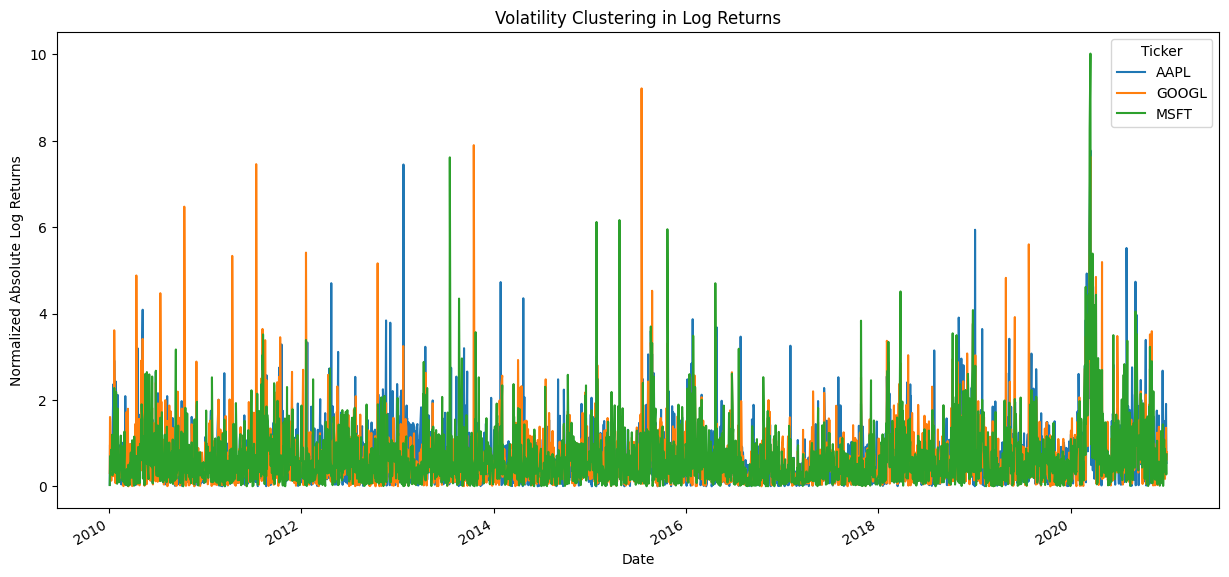

In [15]:
import matplotlib.pyplot as plt

# Calculating the absolute log returns as a proxy for volatility
volatility = normalized_data.abs()

# Plotting the volatility of the stocks
volatility[['AAPL', 'GOOGL', 'MSFT']].plot(figsize=(15, 7))
plt.title('Volatility Clustering in Log Returns')
plt.xlabel('Date')
plt.ylabel('Normalized Absolute Log Returns')
plt.show()



The normalized absolute log returns for three different stocks: AAPL (Apple Inc.), GOOGL (Alphabet Inc.), and MSFT (Microsoft Corp.) over a period from 2010 to the end of 2020. Here’s what can be interpreted regarding volatility clustering:

Spikes in Volatility: The spikes represent periods where the absolute log returns—and thus the volatility—are significantly higher than average. This can be indicative of market events that caused larger than normal price movements.

Persistence of High Volatility: Volatility clustering is evident when these spikes are grouped together. If you see periods where the spikes are densely packed, it means high volatility on one day is likely followed by high volatility on subsequent days. Similarly, periods of low spikes suggest low volatility tends to follow low volatility.

Comparing Stocks: The overlapping spikes across AAPL, GOOGL, and MSFT might suggest market-wide events affecting all three stocks simultaneously, leading to increased volatility across the market. Conversely, isolated spikes in one stock might suggest company-specific news or events.

Financial Crises and Major Events: If certain years or months have a noticeable increase in volatility across all stocks (like the financial crisis of 2008 or the COVID-19 market crash in early 2020), these are also captured in the graph. The clustering of volatility around such times can be clearly seen.

Temporal Patterns: Any patterns in volatility related to specific times of the year (like end-of-quarter or during earnings announcements) may also be observed.

FAT TAILED DISTRIBUTIONS OF RETURNS

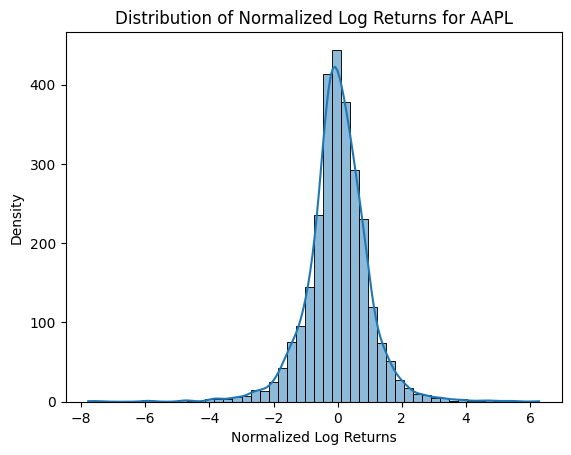

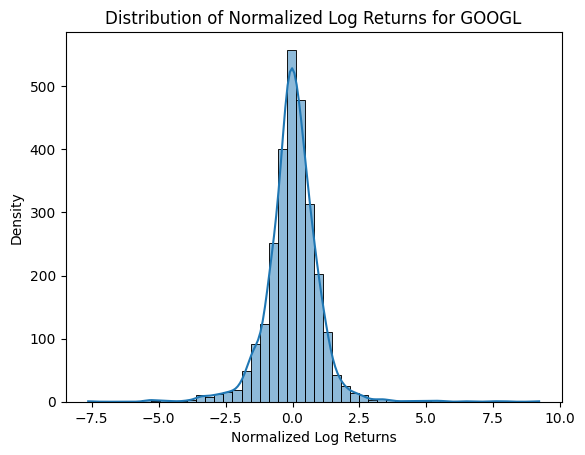

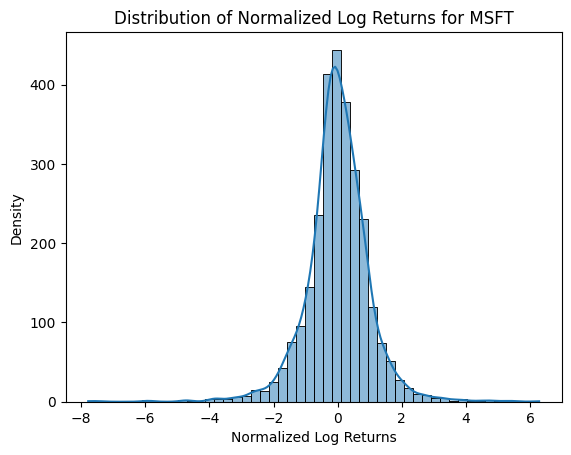

In [18]:
import seaborn as sns

# Plotting the distribution of log returns for Apple
sns.histplot(normalized_data['AAPL'], kde=True, bins=50)
plt.title('Distribution of Normalized Log Returns for AAPL')
plt.xlabel('Normalized Log Returns')
plt.ylabel('Density')
plt.show()

# Plotting the distribution of log returns for Google
sns.histplot(normalized_data['GOOGL'], kde=True, bins=50)
plt.title('Distribution of Normalized Log Returns for GOOGL')
plt.xlabel('Normalized Log Returns')
plt.ylabel('Density')
plt.show()

# Plotting the distribution of log returns for Microsoft
sns.histplot(normalized_data['AAPL'], kde=True, bins=50)
plt.title('Distribution of Normalized Log Returns for MSFT')
plt.xlabel('Normalized Log Returns')
plt.ylabel('Density')
plt.show()




Peakedness (Kurtosis): All three distributions show a sharp peak around the mean. This peakedness, or leptokurtosis, is a common characteristic in financial data and indicates a higher likelihood of observing extreme returns (both positive and negative) than what a normal distribution would predict.

Fat Tails: If the tails of these distributions contain more data points than what would be expected under a normal distribution, this is indicative of fat tails. The presence of fat tails means that extreme returns are more likely to occur than the normal distribution suggests, which is a critical consideration for risk management in finance.

Symmetry: The histograms for AAPL, GOOGL, and MSFT appear to be fairly symmetric around the mean, suggesting that there is no significant skewness. Skewness would imply a bias toward either positive or negative returns, but here, the risk of extreme returns seems to be balanced on both sides.

Comparative Volatility: By comparing the width of the distributions, you can infer relative volatility. A wider distribution indicates more volatility in the stock's returns. If one histogram is noticeably wider than the others, it would suggest that stock has had more variable returns over the period analyzed.

Outliers and Extreme Events: Any data points that fall far from the mean (in the tails) may indicate periods of extreme market activity, such as crashes, booms, or significant company events. For all three stocks, the tails extending beyond the central peak can represent such occurrences.

Comparative Risk: These histograms also help in comparing the risk profiles of the three stocks. If one stock shows heavier tails, it might be considered riskier. However, without numeric kurtosis values or additional statistical testing, we can't definitively quantify the differences in risk

LEVERAGE EFFECTS

In [20]:
# Demonstrating the Leverage Effect
# Calculating the correlation between log returns and changes in volatility for AAPL
apple_returns = normalized_data['AAPL']
apple_volatility_changes = volatility['AAPL'].diff()

correlation = apple_returns.corr(apple_volatility_changes)
print(f"Correlation between AAPL returns and volatility changes: {correlation}")

# Demonstrating the Leverage Effect
# Calculating the correlation between log returns and changes in volatility for GOOGL
apple_returns = normalized_data['GOOGL']
apple_volatility_changes = volatility['GOOGL'].diff()

correlation = apple_returns.corr(apple_volatility_changes)
print(f"Correlation between GOOGL returns and volatility changes: {correlation}")

# Demonstrating the Leverage Effect
# Calculating the correlation between log returns and changes in volatility for MSFT
apple_returns = normalized_data['MSFT']
apple_volatility_changes = volatility['MSFT'].diff()

correlation = apple_returns.corr(apple_volatility_changes)
print(f"Correlation between MSFT returns and volatility changes: {correlation}")




Correlation between AAPL returns and volatility changes: -0.05475843290543741
Correlation between GOOGL returns and volatility changes: 0.0015213736511183378
Correlation between MSFT returns and volatility changes: -0.011055565148121874


MEAN REVERSION

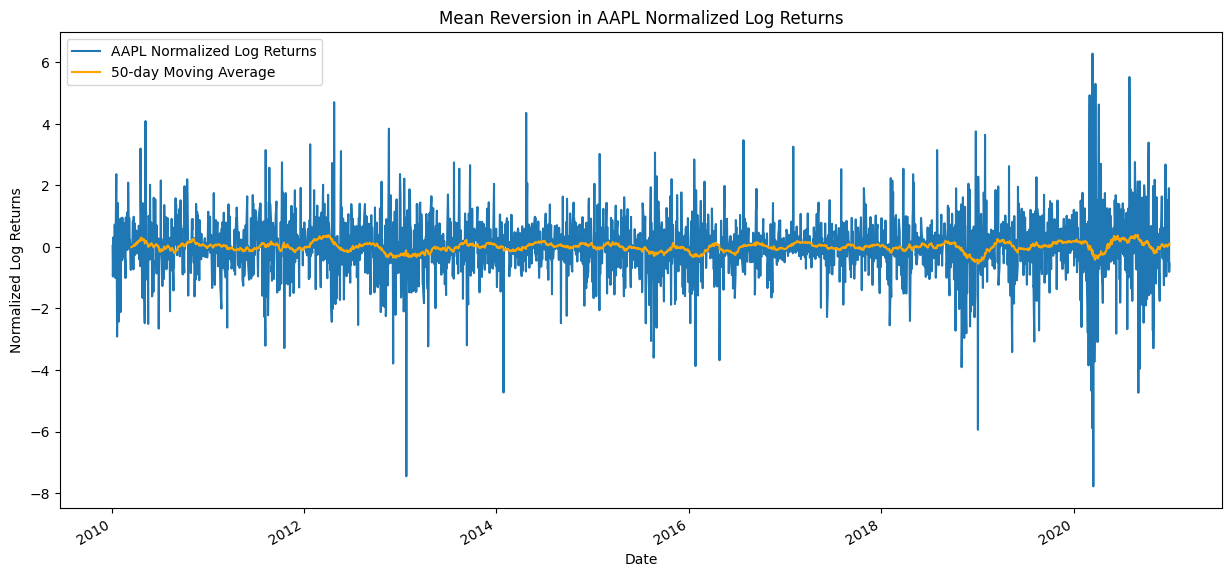

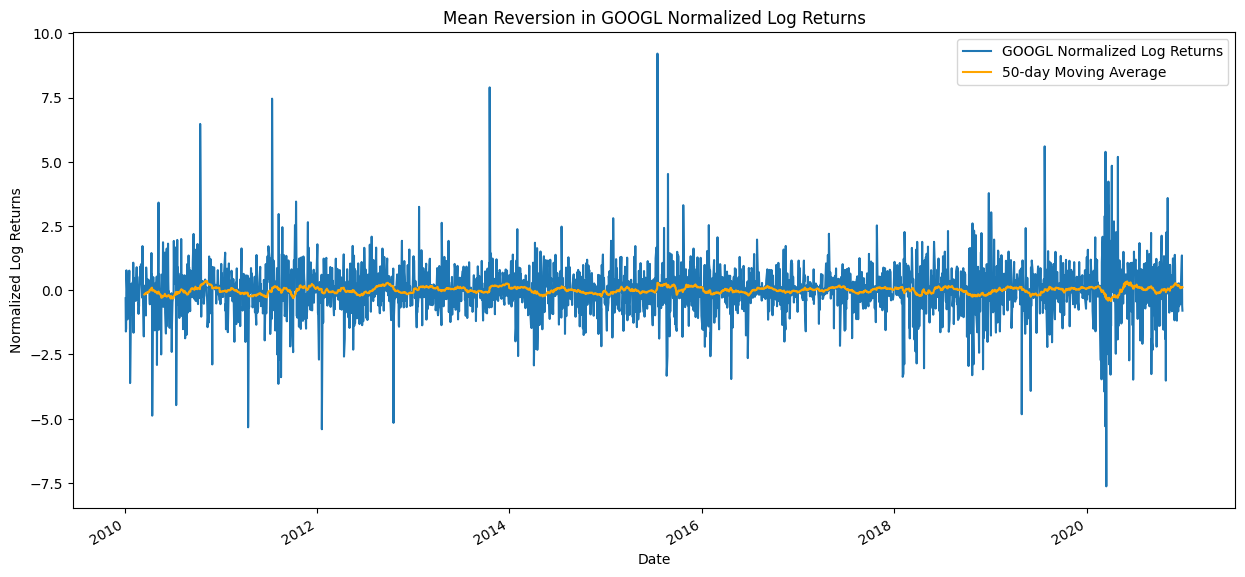

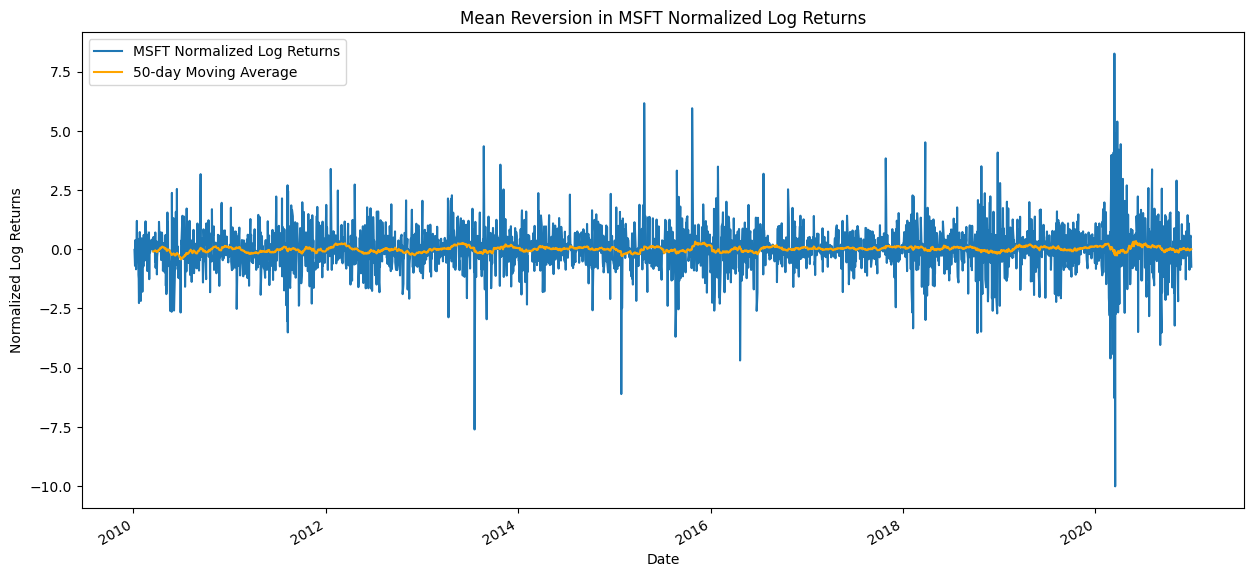

In [22]:
# Calculating the moving average
moving_average = normalized_data['AAPL'].rolling(window=50).mean()

# Plotting AAPL returns and its moving average
plt.figure(figsize=(15, 7))
normalized_data['AAPL'].plot(label='AAPL Normalized Log Returns')
moving_average.plot(label='50-day Moving Average', color='orange')
plt.legend()
plt.title('Mean Reversion in AAPL Normalized Log Returns')
plt.xlabel('Date')
plt.ylabel('Normalized Log Returns')
plt.show()


# Calculating the moving average
moving_average = normalized_data['GOOGL'].rolling(window=50).mean()

# Plotting AAPL returns and its moving average
plt.figure(figsize=(15, 7))
normalized_data['GOOGL'].plot(label='GOOGL Normalized Log Returns')
moving_average.plot(label='50-day Moving Average', color='orange')
plt.legend()
plt.title('Mean Reversion in GOOGL Normalized Log Returns')
plt.xlabel('Date')
plt.ylabel('Normalized Log Returns')
plt.show()


# Calculating the moving average
moving_average = normalized_data['MSFT'].rolling(window=50).mean()

# Plotting AAPL returns and its moving average
plt.figure(figsize=(15, 7))
normalized_data['MSFT'].plot(label='MSFT Normalized Log Returns')
moving_average.plot(label='50-day Moving Average', color='orange')
plt.legend()
plt.title('Mean Reversion in MSFT Normalized Log Returns')
plt.xlabel('Date')
plt.ylabel('Normalized Log Returns')
plt.show()



Fluctuations Around the Mean: For all three stocks, the normalized log returns fluctuate around their respective moving averages. This suggests that while stock prices may deviate from their historical average, they tend to return to it over time, which is a characteristic of mean reversion.

Moving Average as a Trend Indicator: The 50-day moving average provides a smoothed representation of the stock's price movements. If the log returns frequently cross the moving average line, it could indicate mean-reverting behavior, as the prices oscillate around the moving average.

Magnitude of Deviations: The distance of the peaks and troughs from the moving average line can give an idea of the volatility and the strength of the mean reversion. A stock with returns that sharply deviate from the moving average but then return to it shows a strong mean-reverting tendency.

Frequency of Crossovers: The number of times the normalized log returns cross the moving average line also provides insight into the mean-reverting behavior. Frequent crossovers suggest a consistent mean reversion, while fewer crossovers might indicate a trend-following behavior or a change in the mean level itself.

Extreme Values: The graphs show some extreme values (spikes) for each stock, where the log returns deviate significantly from the moving average. Observing how quickly and frequently the returns revert to the moving average after such extremes can further validate the presence of mean reversion.

BAYESIAN NETWORK

In [23]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.estimators import BayesianEstimator

# Assume 'data' is a DataFrame containing your financial data with columns as different financial instruments
# Using structure learning to find the best model (this can be computationally intensive for large datasets)
hc = HillClimbSearch(data, scoring_method=BicScore(data))
best_model = hc.estimate()
print("Best model structure:", best_model.edges())


ModuleNotFoundError: No module named 'pgmpy'

In [24]:
pip install pgmpy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.0 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.5 MB/s eta 0:00:0000:0100:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 3.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 4.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 4.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 5.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 8.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 517.5 kB/s eta 0:00:0000:0100:05
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.9 MB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 3.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━

In [27]:
! pip install --upgrade ipywidgets




Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 2.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 11.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.0/215.0 kB 17.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [28]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.9 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [29]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.estimators import BayesianEstimator

# Assume 'data' is a DataFrame containing your financial data with columns as different financial instruments
# Using structure learning to find the best model (this can be computationally intensive for large datasets)
hc = HillClimbSearch(data, scoring_method=BicScore(data))
best_model = hc.estimate()
print("Best model structure:", best_model.edges())


TypeError: BaseEstimator.__init__() got an unexpected keyword argument 'scoring_method'

In [31]:

! jupyter nbextension enable --py widgetsnbextension


usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run troubleshoot

Jupyter command `jupyter-nbextension` not found.


In [39]:
from pgmpy.models import BayesianNetwork

# Define the structure of the Bayesian Network
model = BayesianNetwork([
    ('Market', 'AAPL'), 
    ('Market', 'GOOGL'), 
    ('Market', 'MSFT')
])

In [41]:
def categorize_returns(returns):
    # Define boundaries for the states - these thresholds can be adjusted
    thresholds = [-np.inf, -1.0, -0.5, 0.5, 1.0, np.inf]
    categories = pd.cut(returns, thresholds, labels=False) - 2
    return categories

# Apply the categorization to each stock
categories = normalized_data.apply(categorize_returns)


In [43]:
# Example of discretizing 'AAPL' returns into 3 states
categories = pd.qcut(normalized_data['AAPL'], q=3, labels=['Low', 'Medium', 'High'])

# Viewing the first few entries of the categorized data
print(categories.head())



Date
2010-01-05    Medium
2010-01-06       Low
2010-01-07    Medium
2010-01-08    Medium
2010-01-11       Low
Name: AAPL, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


In [44]:
import numpy as np

# Initialize a transition matrix with zeros
states = ['Low', 'Medium', 'High']
transition_matrix = pd.DataFrame(0, index=states, columns=states, dtype=np.float64)

# Count transitions
for (prev_state, next_state) in zip(categories[:-1], categories[1:]):
    transition_matrix.at[prev_state, next_state] += 1

# Convert counts to probabilities
transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

print(transition_matrix)


             Low    Medium      High
Low     0.354664  0.290672  0.354664
Medium  0.325380  0.370933  0.303688
High    0.321041  0.337310  0.341649


In [45]:
current_state = 'Medium'
next_state_probabilities = transition_matrix.loc[current_state]
print(f"Transition probabilities from {current_state}:", next_state_probabilities)


Transition probabilities from Medium: Low       0.325380
Medium    0.370933
High      0.303688
Name: Medium, dtype: float64


Low 0.325380: There's a 32.54% probability that the system will transition from the "Medium" state to the "Low" state in the next time step. This means if the market or a stock's return is currently in a medium state, there's roughly a one-third chance it will drop to a low state.

Medium 0.370933: There's a 37.09% probability that the system will remain in the "Medium" state in the next time step. This suggests that staying in the same state (here, medium returns) is slightly more likely than moving to a low or high state.

High 0.303688: There's a 30.37% probability that the system will transition from the "Medium" state to the "High" state in the next time step. This indicates there's about a three in ten chance that if the returns are currently medium, they will increase to a high level.

In [47]:
! pip install numpy pandas yfinance arch


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 7.5 MB/s eta 0:00:0000:0100:01
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [48]:
import numpy as np
import pandas as pd
import yfinance as yf
from arch import arch_model

# Define the stock symbols and the data range
symbols = ['AAPL', 'GOOGL', 'MSFT']  # Example: Apple, Google, Microsoft
start_date = '2010-01-01'
end_date = '2020-12-31'

# Fetch the data
data = yf.download(symbols, start=start_date, end=end_date)

# Select Adjusted Close Prices
adj_close_prices = data['Adj Close']

# Calculate log returns
log_returns = np.log(adj_close_prices / adj_close_prices.shift(1)).dropna()

# Fit a GARCH(1,1) model for each stock
for ticker in symbols:
    # Selecting the series for the ticker
    series = log_returns[ticker]
    
    # Defining the GARCH model
    model = arch_model(series, mean='Zero', vol='Garch', p=1, q=1)
    
    # Fitting the model
    model_fit = model.fit(disp='off')  # disp='off' to suppress output
    
    # Printing the summary of the fit
    print(f"Summary for {ticker}:")
    print(model_fit.summary())
    print("\n")


[*********************100%%**********************]  3 of 3 completed
/home/thechemist54/.local/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003185. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/thechemist54/.local/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002652. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.



Summary for AAPL:
                       Zero Mean - GARCH Model Results                        
Dep. Variable:                   AAPL   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                7424.86
Distribution:                  Normal   AIC:                          -14843.7
Method:            Maximum Likelihood   BIC:                          -14825.9
                                        No. Observations:                 2767
Date:                Sat, Mar 23 2024   Df Residuals:                     2767
Time:                        16:34:46   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      3.1650e-05  1.376e-06     22.

/home/thechemist54/.local/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002559. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                   AAPL   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                7424.86
Distribution:                  Normal   AIC:                          -14843.7
Method:            Maximum Likelihood   BIC:                          -14825.9
                                        No. Observations:                 2767
Date:                Sat, Mar 23 2024   Df Residuals:                     2767
Time:                        16:34:46   Df Model:                            0
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      3.1650e-05  1.376e-06     22.997 5.013e-117 [2.895e-05,3.435e-05]
alpha[1]       0.0990  1.377e-02      7.188  6.562e-13   [7.201e-02,  0.126]
beta[1]        0.7920  1.304e-02     60.720      0.000     [  0.766,  0.818]
============================================================================

Dep. Variable: The dependent variable, in this case, AAPL's log returns.
Mean Model: Zero Mean indicates that the model does not predict the returns themselves but focuses on modeling the volatility of returns.
Vol Model: GARCH signifies that the volatility of today's returns is assumed to be influenced by past volatilities and past squared returns.
Distribution: Normal indicates the assumed distribution of the returns; here, it's the normal distribution.

Volatility Model Coefficients
The GARCH(1,1) model parameters indicate how past values influence current volatility:

omega (ω): The constant term in the volatility equation. It represents the long-run average variance. Here, it's 
3.1650 x10-5, suggesting a small baseline volatility in the absence of recent returns information.

alpha[1] (α[1]): Represents the impact of the lagged squared returns on today's volatility. An α[1] of 0.0990 indicates that nearly 9.9% of yesterday's squared returns contribute to today's volatility. This parameter captures the short-term persistence in volatility.

beta[1] (β[1]): Measures the influence of lagged volatility on today's volatility. A β[1] of 0.7920 means past volatility significantly influences current volatility, indicating a high level of volatility persistence over time.

The model suggests that both past returns and past volatility have significant effects on the current volatility of AAPL's log returns.

The sum of α[1] and β[1] is close to 1 (0.0990+0.7920 =0.891), indicating a high level of volatility persistence. This means that if AAPL's stock experiences high volatility on a given day, it's likely to remain volatile in the near future.

The model is robust, as indicated by the covariance estimator, meaning it's reliable for making inferences about AAPL's volatility.

In [50]:
residuals = model_fit.resid
standardized_residuals = model_fit.resid / model_fit.conditional_volatility



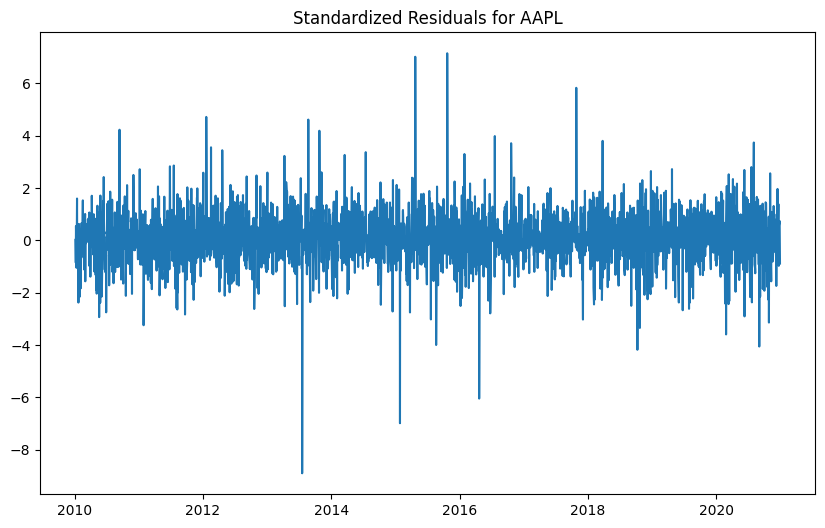

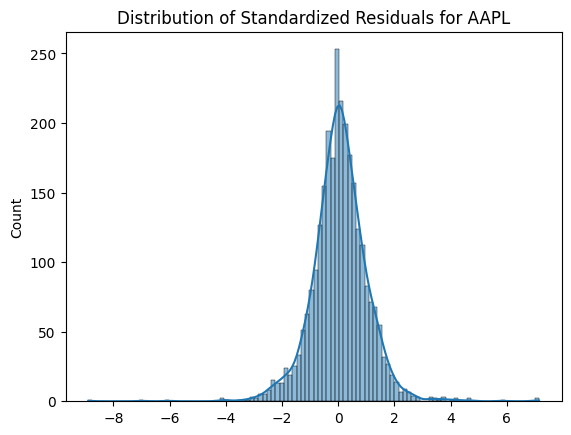

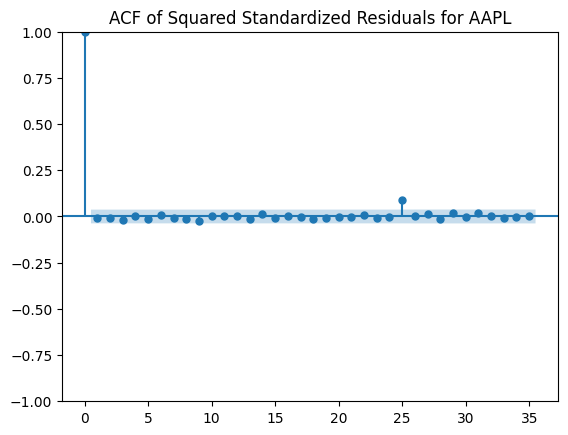

In [51]:
# Basic plot of residuals
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(standardized_residuals)
plt.title('Standardized Residuals for AAPL')
plt.show()

# Checking for normality of standardized residuals
import seaborn as sns

sns.histplot(standardized_residuals, kde=True)
plt.title('Distribution of Standardized Residuals for AAPL')
plt.show()

# You might also check for autocorrelation of squared residuals
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(standardized_residuals**2)
plt.title('ACF of Squared Standardized Residuals for AAPL')
plt.show()

Standardized Residuals Over Time: The first graph shows the standardized residuals from the GARCH model plotted over time. The standardized residuals are the model residuals divided by the conditional volatility, giving you a series that should ideally resemble white noise if the model is capturing the volatility structure correctly. In an ideal scenario, most of these residuals would fall within a few standard deviations from zero (typically between -2 and 2), indicating that the model has appropriately captured the volatility. Occasional spikes beyond this range are expected, but if they're too frequent or too extreme, it might indicate that the model is not fully capturing the dynamics of the data.

Distribution of Standardized Residuals: The second graph is a histogram of the standardized residuals, which should ideally follow a standard normal distribution (mean of zero and standard deviation of one) if the GARCH model is appropriately capturing the volatility. The kernel density estimate (KDE) overlay would help visualize this distribution's fit to a normal distribution. The graph indicates a concentration of values around the mean and a rapid drop-off as we move away from the center, suggesting a leptokurtic distribution (a "peakier" distribution with fatter tails than a normal distribution). This can be a sign that while the GARCH model is capturing much of the volatility, there may be extreme movements in the stock price that it isn't fully accounting for.

Model Fit: If the standardized residuals don't show patterns over time and look like white noise, and their distribution closely resembles a normal distribution, the model is considered to be a good fit.

Fat Tails: If the distribution of standardized residuals has fatter tails than the normal distribution, this indicates the presence of kurtosis, meaning that extreme returns are more frequent than what a normal distribution would predict. This is common in financial time series data.

Outliers: The extreme values in the standardized residuals might correspond to real-world events that caused significant market moves, such as earnings reports, product launches, or macroeconomic changes.

If the residuals are not normally distributed, it might imply that an alternative distribution (like the Student's t-distribution) could be a better choice for the error distribution in the GARCH model. Also, significant autocorrelations in squared residuals could suggest that a more complex model, such as a GARCH with a higher order or an EGARCH or TGARCH model, which can capture asymmetric effects in volatility, might be needed

In [52]:

forecasts = model_fit.forecast(horizon=5)  # For 5 days ahead, for example
future_volatility = forecasts.variance[-1:]  # This gives the forecasted variance


In [53]:
from arch import arch_model
from statsmodels.stats.diagnostic import acorr_ljungbox

# Using the model_fit from your previous GARCH fitting
ljung_box_test = acorr_ljungbox(model_fit.std_resid, lags=[10], return_df=True)

# Forecast the next period's volatility
forecasts = model_fit.forecast(horizon=1)
next_day_variance = forecasts.variance.iloc[-1]

# Use the volatility forecast for risk management or further analysis
# ...

print(ljung_box_test)
print(next_day_variance)


      lb_stat  lb_pvalue
10  22.272602   0.013775
h.1    0.000162
Name: 2020-12-30 00:00:00, dtype: float64


The variance here is a measure of the forecasted volatility of the stock's return. A higher variance suggests more uncertainty or risk associated with the stock price. The figure you've given suggests the model's expectation of volatility for the next period, which you can interpret in the context of your risk management or investment strategy.
